In [602]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

特征值包含：上一次员工评分，每月平均工作时长，工龄（年），在职期间完成的项目数量，是否有工伤，过去5年是否有升职，工作部门，工资相对等级，福利待遇相对等级。  
员工满意度  
回头试一下集成学习。

In [603]:
df = pd.read_csv(r'.\data\训练集.csv')
df

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary,satisfaction_level
0,13697,0.99,3,161.39,2,0,a,0,accounting,medium,0.681
1,1142,1.00,5,226.22,6,0,b,0,marketing,low,0.876
2,7954,0.91,5,199.45,2,0,e,0,sales,medium,0.955
3,2225,0.51,3,235.14,3,0,c,0,sales,low,0.817
4,9753,0.89,3,219.91,2,0,a,0,technical,low,0.920
...,...,...,...,...,...,...,...,...,...,...,...
11994,11971,0.89,4,150.45,3,0,e,0,accounting,high,0.849
11995,14966,0.81,5,221.28,5,0,b,0,sales,low,0.836
11996,7491,0.60,4,136.36,4,1,c,0,sales,medium,0.915
11997,12680,0.84,6,268.54,4,0,b,0,IT,low,0.099


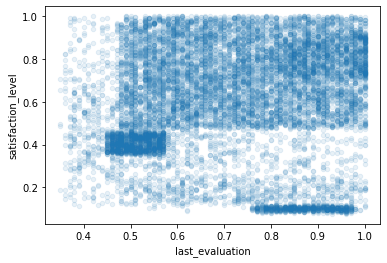

In [604]:
df[["last_evaluation","satisfaction_level"]].plot(kind="scatter",x="last_evaluation",y="satisfaction_level",alpha=0.1)

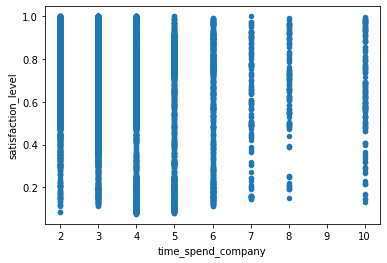

In [605]:
df[["time_spend_company","satisfaction_level"]].plot(kind="scatter",x="time_spend_company",y="satisfaction_level")

In [606]:
df[df["time_spend_company"]==2]["satisfaction_level"].describe()

count    2579.000000
mean        0.695919
std         0.184761
min         0.086000
25%         0.565500
50%         0.703000
75%         0.845000
max         1.000000
Name: satisfaction_level, dtype: float64

In [607]:
df[["number_project","satisfaction_level"]].groupby(by="number_project").count()

,satisfaction_level
number_project,
2,1917
3,3273
4,3477
5,2208
6,923
7,201


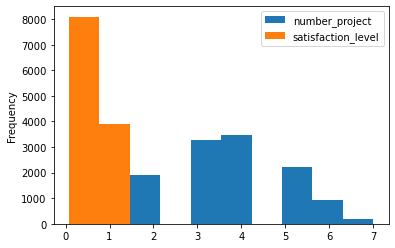

In [608]:
df[["number_project","satisfaction_level"]].plot(kind="hist")

In [609]:
df['package']=pd.DataFrame(OrdinalEncoder().fit_transform(df["package"].values.reshape(-1,1)))

In [610]:

df['division'] =pd.DataFrame(LabelEncoder().fit_transform(df['division']))

In [611]:
salary_dict = {'low':1,'medium':2,'high':3}
df['salary']=df['salary'].replace(salary_dict)

In [612]:
df

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary,satisfaction_level
0,13697,0.99,3,161.39,2,0,0.0,0,2,2,0.681
1,1142,1.00,5,226.22,6,0,1.0,0,5,1,0.876
2,7954,0.91,5,199.45,2,0,4.0,0,7,2,0.955
3,2225,0.51,3,235.14,3,0,2.0,0,7,1,0.817
4,9753,0.89,3,219.91,2,0,0.0,0,9,1,0.920
...,...,...,...,...,...,...,...,...,...,...,...
11994,11971,0.89,4,150.45,3,0,4.0,0,2,3,0.849
11995,14966,0.81,5,221.28,5,0,1.0,0,7,1,0.836
11996,7491,0.60,4,136.36,4,1,2.0,0,7,2,0.915
11997,12680,0.84,6,268.54,4,0,1.0,0,0,1,0.099


In [613]:
x = df.iloc[:,2:-1]
y = df.iloc[:,-1]

In [614]:
def guiyi(x):
    mean = x.mean(0)
    std = x.std(0)
    x = (x - mean) / std
    return x

In [615]:
x = guiyi(x)
theta_0 = np.ones((len(x),1))
x['tehta_0'] = theta_0
x

,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary,tehta_0
0,-0.647041,-0.818064,-1.025099,-0.412094,-1.325148,-0.144969,-1.342809,0.644678,1.0
1,0.979066,0.481449,1.706904,-0.412094,-0.658602,-0.144969,-0.299397,-0.929176,1.0
2,0.979066,-0.055154,-1.025099,-0.412094,1.341035,-0.144969,0.396211,0.644678,1.0
3,-0.647041,0.660250,-0.342098,-0.412094,0.007944,-0.144969,0.396211,-0.929176,1.0
4,-0.647041,0.354966,-1.025099,-0.412094,-1.325148,-0.144969,1.091819,-0.929176,1.0
...,...,...,...,...,...,...,...,...,...
11994,0.166012,-1.037356,-0.342098,-0.412094,1.341035,-0.144969,-1.342809,2.218532,1.0
11995,0.979066,0.382427,1.023903,-0.412094,-0.658602,-0.144969,0.396211,-0.929176,1.0
11996,0.166012,-1.319789,0.340903,2.426431,0.007944,-0.144969,0.396211,0.644678,1.0
11997,1.792119,1.329751,0.340903,-0.412094,-0.658602,-0.144969,-2.038417,-0.929176,1.0


In [616]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

In [617]:
from sklearn.preprocessing import PolynomialFeatures  # 导入多项式特征函数
poly_reg = PolynomialFeatures(degree=3)  # 实例化对象，degree参数是要生成的最高次方数，这里是3次方。
train_x = poly_reg.fit_transform(train_x)  # 将一元一次方程转化为一元三次方程的训练集。同时会加一列 θ0 的特征值，即“1”。
test_x = poly_reg.fit_transform(test_x)

In [618]:
line_model=LinearRegression()
line_model.fit(train_x,train_y)
pred_y = line_model.predict(test_x)

In [619]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print(mean_absolute_error(test_y,pred_y))  # 平均绝对误差，最优值 0.0
print(mean_squared_error(test_y,pred_y))   # 均方误差  最优值0.0
print(median_absolute_error(test_y,pred_y))  # 中值绝对误差  0.0
print(r2_score(test_y,pred_y))  # R方值 1.0

0.1595597850656675
0.04012890196141372
0.13869513604044914
0.3499814677018761


In [620]:
from sklearn.svm import SVR

In [621]:
svr_model = SVR()

In [622]:
svr_model.fit(train_x,train_y)
pred_svr_y = svr_model.predict(test_x)

In [623]:
print(mean_absolute_error(test_y,pred_svr_y))  # 平均绝对误差，最优值 0.0
print(mean_squared_error(test_y,pred_svr_y))   # 均方误差  最优值0.0
print(median_absolute_error(test_y,pred_svr_y))  # 中值绝对误差  0.0
print(r2_score(test_y,pred_svr_y))  # R方值 1.0

0.1527847601965934
0.03816687683574887
0.12266601233694363
0.38176286789426195


In [624]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor#AdaBoost分类模型


In [625]:
ada_reg = AdaBoostRegressor()

In [626]:
ada_reg.fit(train_x,train_y)
pred_svr_y = ada_reg.predict(test_x)
print(mean_absolute_error(test_y,pred_svr_y))  # 平均绝对误差，最优值 0.0
print(mean_squared_error(test_y,pred_svr_y))   # 均方误差  最优值0.0
print(median_absolute_error(test_y,pred_svr_y))  # 中值绝对误差  0.0
print(r2_score(test_y,pred_svr_y))  # R方值 1.0

0.15876042341399257
0.038423435949703426
0.13513237138511391
0.377607055735215


In [629]:
forest_mode = RandomForestRegressor()
forest_mode.fit(train_x,train_y)
pred_forest_y = forest_mode.predict(test_x)
print(mean_absolute_error(test_y,pred_forest_y))  # 平均绝对误差，最优值 0.0
print(mean_squared_error(test_y,pred_forest_y))   # 均方误差  最优值0.0
print(median_absolute_error(test_y,pred_forest_y))  # 中值绝对误差  0.0
print(r2_score(test_y,pred_forest_y))  # R方值 1.0

0.1402478801256614
0.03517251483876151
0.1091650000000004
0.4302663328612968
